In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
!pip install seaborn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)


In [7]:
rows, cols = df.shape
print(f"Rows: {rows}, Columns: {cols}")
print(df.dtypes)
print(df.info())
print(df.describe())

unique_locations = df['location'].nunique()
continent_max_freq = df['continent'].value_counts().idxmax()
max_total_cases = df['total_cases'].max()
mean_total_cases = df['total_cases'].mean()
quartiles_total_deaths = df['total_deaths'].quantile([0.25, 0.50, 0.75])
continent_max_hdi = df.groupby('continent')['human_development_index'].max().idxmax()
continent_min_gdp = df.groupby('continent')['gdp_per_capita'].min().idxmin()



Rows: 57394, Columns: 49
iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_ic

In [8]:
columns_to_keep = ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']
df = df[columns_to_keep]


In [9]:
df = df.drop_duplicates()
missing_values = df.isnull().sum()
df = df.dropna(subset=['continent'])
df = df.fillna(0)


In [10]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month


C:\Users\John Daniel\AppData\Local\Temp\ipykernel_17232\1630737625.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [11]:
df_groupby = df.groupby('continent').max().reset_index()
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']


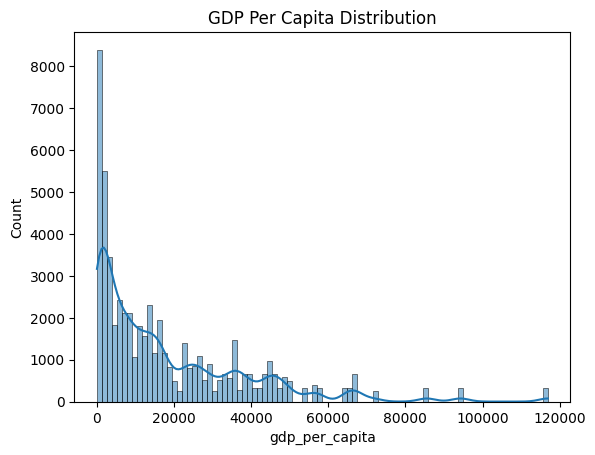

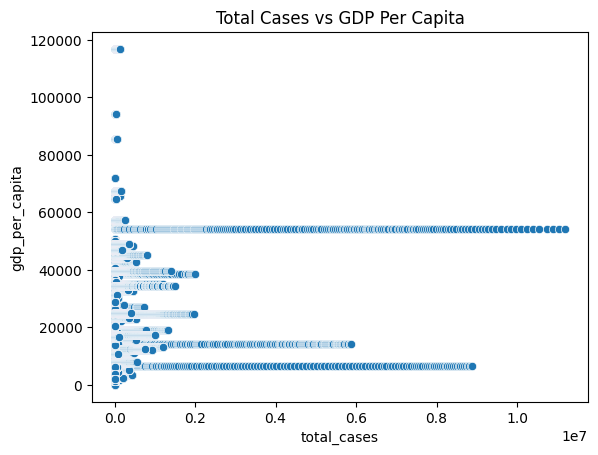

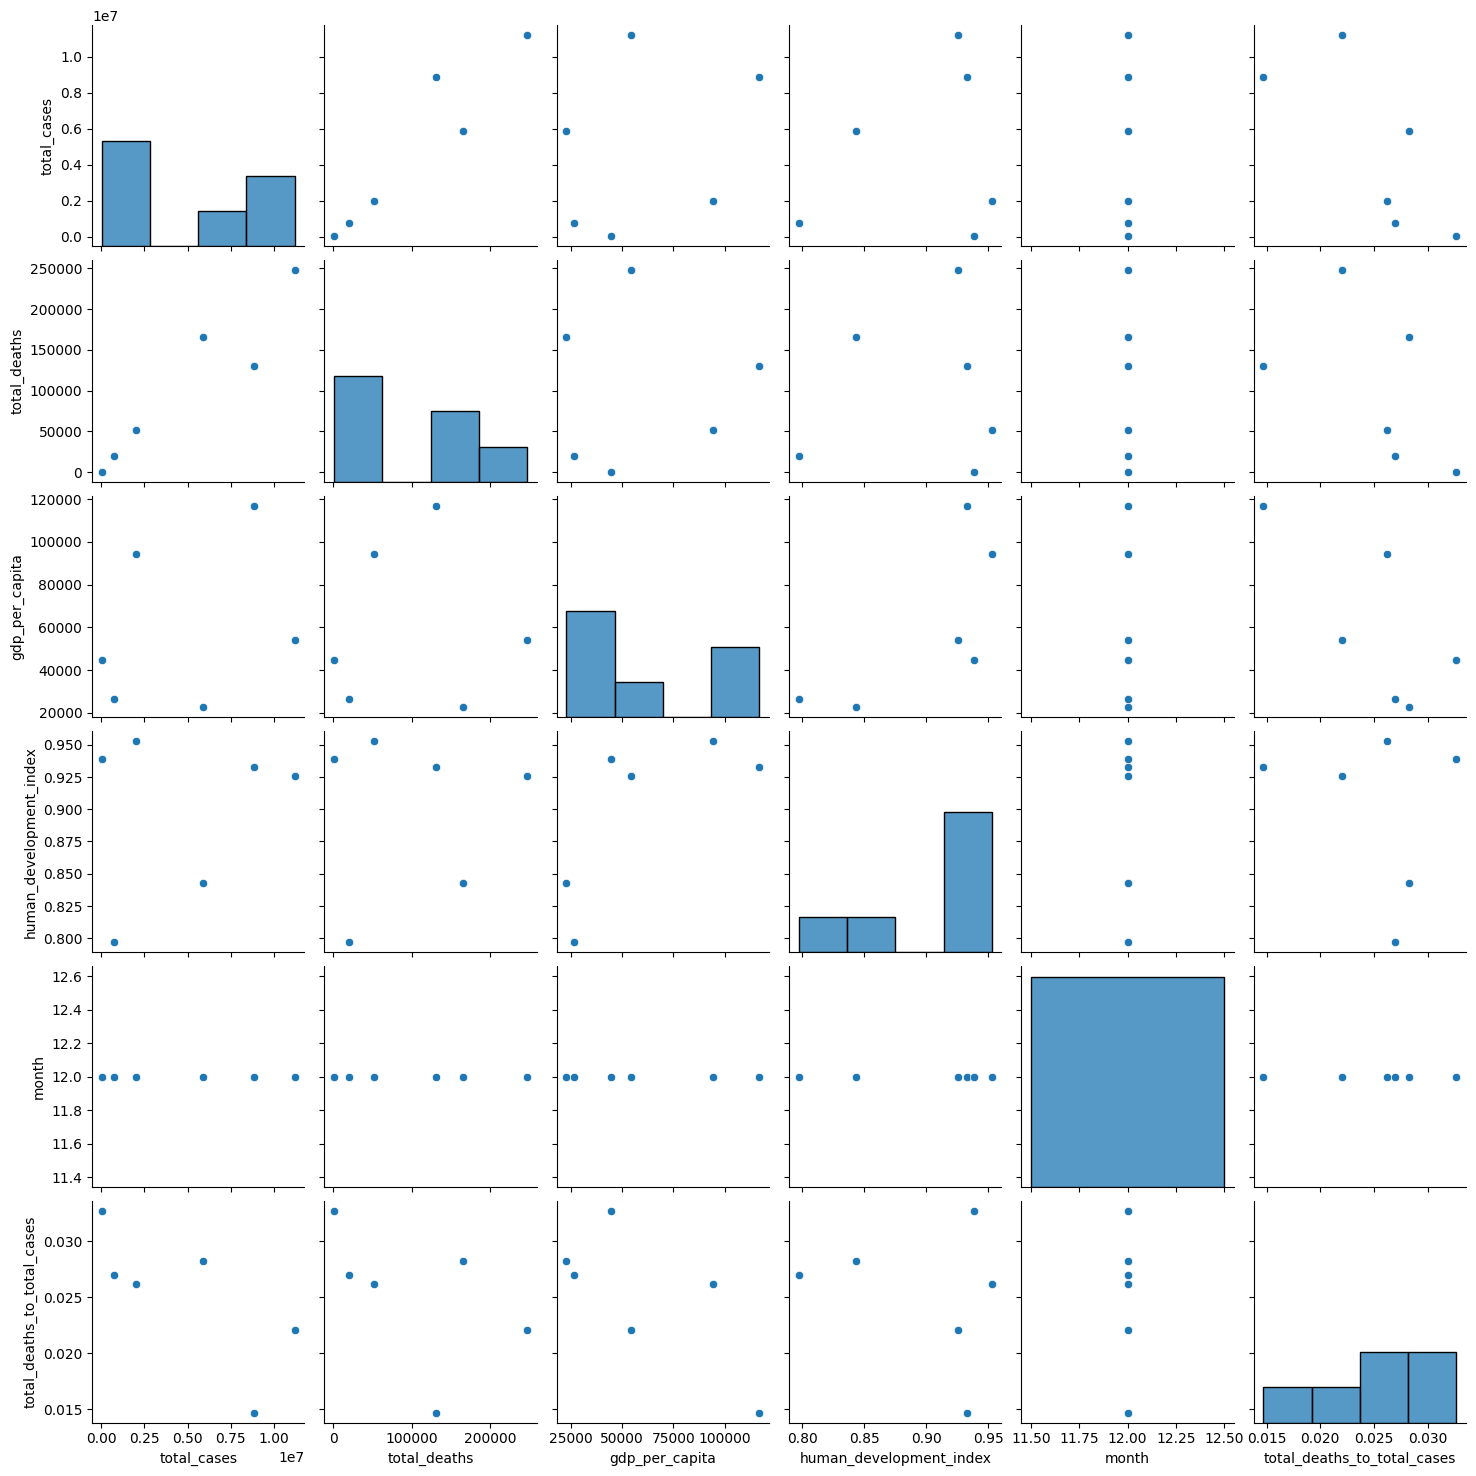

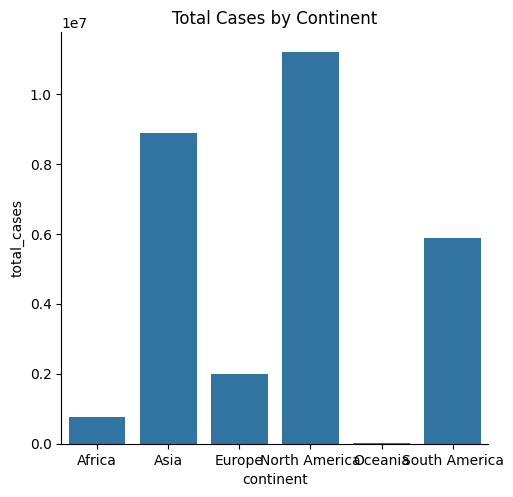

In [12]:
sns.histplot(df['gdp_per_capita'], kde=True)
plt.title('GDP Per Capita Distribution')
plt.show()

sns.scatterplot(data=df, x='total_cases', y='gdp_per_capita')
plt.title('Total Cases vs GDP Per Capita')
plt.show()

sns.pairplot(df_groupby)
plt.show()

sns.catplot(data=df_groupby, x='continent', y='total_cases', kind='bar')
plt.title('Total Cases by Continent')
plt.show()


In [14]:
df_groupby.to_csv('df_groupby.csv', index=False)
